## 讀取資料

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
# 讀取 test.csv
test_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/topic-test/test.csv')

# 讀取 train.csv
train_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/topic-test/train.csv')

## 將兩張表格空值設為0

In [ ]:
# 將 train.csv 中的空值替換為 0
train_df.fillna(0, inplace=True)

# 將 test.csv 中的空值替換為 0
test_df.fillna(0, inplace=True)

In [ ]:
train_df.head()
test_df.head()

,Character,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,668,Quort,Wildling,41.0,1,0,0,0,1,0,0
1,30,Alyx Frey,0,49.0,1,1,0,0,1,0,0
2,377,Jacelyn Bywater,Lannister,8.0,0,1,0,1,0,0,0
3,535,Meha,Wildling,0.0,0,0,0,0,0,0,1
4,806,Tickler,Lannister,26.0,1,0,0,1,1,0,0


## 將三個代表死亡的欄位取「Death Year」並設為 binary data

In [ ]:
# 只保留 Death Year 欄位，並將其重命名為 'death'
train_df['death'] = train_df['Death Year'].apply(lambda x: 1 if x != 0 else 0)

# 刪除 'Death Year', 'Book of Death', 'Death Chapter' 這三個欄位中的另外兩個
train_df.drop(columns=['Death Year', 'Book of Death', 'Death Chapter'], inplace=True)

# 檢查資料處理後的結果
train_df.head()

,Character,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,death
0,155,Creighton Longbough,0,4.0,1,0,0,0,0,1,0,0
1,362,Howd Wanderer,Wildling,58.0,1,1,0,0,0,0,1,0
2,868,Watt,Night's Watch,69.0,1,0,0,0,1,0,0,1
3,101,Borcas,Night's Watch,48.0,1,0,1,0,0,0,0,0
4,199,Donnis,House Stark,7.0,1,0,1,0,0,0,0,0


## 將「Alegiances」作虛擬變數轉換

In [ ]:
# 使用 pandas 的 get_dummies 來將 Allegiances 轉換成 dummy 特徵
train_df = pd.get_dummies(train_df, columns=['Allegiances'], drop_first=True)

# 檢查處理後的資料集，確保特徵轉換成功
train_df.head()

,Character,Name,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,Allegiances_House Tully,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,155,Creighton Longbough,4.0,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,362,Howd Wanderer,58.0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,868,Watt,69.0,1,0,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
3,101,Borcas,48.0,1,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,199,Donnis,7.0,1,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


## 將test資料做相同轉換，之後輸入模型會比較方便。

In [ ]:
# 先對 test.csv 進行 dummy 特徵轉換
test_df = pd.get_dummies(test_df, columns=['Allegiances'], drop_first=True)

# 確保 test_df 中的 dummy 特徵與 train_df 保持一致
# 找出 train_df 中有而 test_df 中沒有的特徵，並補上這些特徵，設置為 0
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# 保持 test_df 的列順序與 train_df 一致
test_df = test_df[train_df.columns.drop('death')]

# 檢查轉換後的 test_df
test_df.head()

,Character,Name,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,Allegiances_House Tully,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,668,Quort,41.0,1,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
1,30,Alyx Frey,49.0,1,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,377,Jacelyn Bywater,8.0,0,1,0,1,0,0,0,...,False,False,True,False,False,False,False,False,False,False
3,535,Meha,0.0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
4,806,Tickler,26.0,1,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False


##把train data分為訓練及與驗證集

In [ ]:
from sklearn.model_selection import train_test_split

# 將 train_df 拆分成 75% 的訓練集和 25% 的測試集
X = train_df.drop(columns=['death'])  # 特徵資料
y = train_df['death']  # 目標標籤

# 使用 train_test_split 進行隨機拆分
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# 檢查拆分後的資料集大小
print(f"訓練集大小: {X_train.shape}, 測試集大小: {X_valid.shape}")


訓練集大小: (515, 30), 測試集大小: (172, 30)


## drop掉「Name」欄位，我覺得對預測沒有影響。

In [ ]:
# 在進行模型訓練之前，刪除 'Character' 和 'Name' 欄位，因為它們對預測無效
X_train = X_train.drop(columns=['Character', 'Name'])
X_valid = X_valid.drop(columns=['Character', 'Name'])

# 重新進行模型訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 在驗證集上進行預測
y_pred = clf.predict(X_valid)

# 計算模型的準確率
from sklearn.metrics import accuracy_score # import the missing function
accuracy = accuracy_score(y_valid, y_pred)
print(f"模型在驗證集上的準確率: {accuracy:.4f}")

模型在驗證集上的準確率: 0.6512


## 製作混淆矩陣

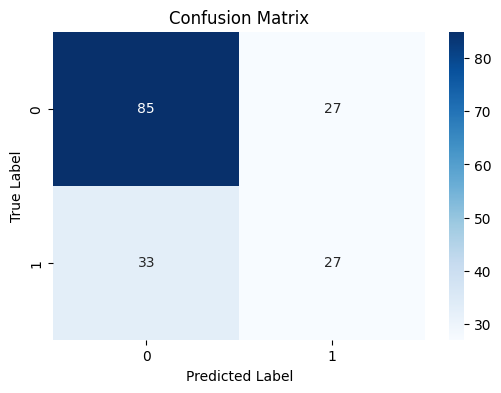

Precision (精確率): 0.5000
Recall (召回率): 0.4500
Accuracy (準確率): 0.6512


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 生成 Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# 可視化 Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 計算 Precision, Recall, Accuracy
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)

print(f'Precision (精確率): {precision:.4f}')
print(f'Recall (召回率): {recall:.4f}')
print(f'Accuracy (準確率): {accuracy:.4f}')


## 繪製decision tree

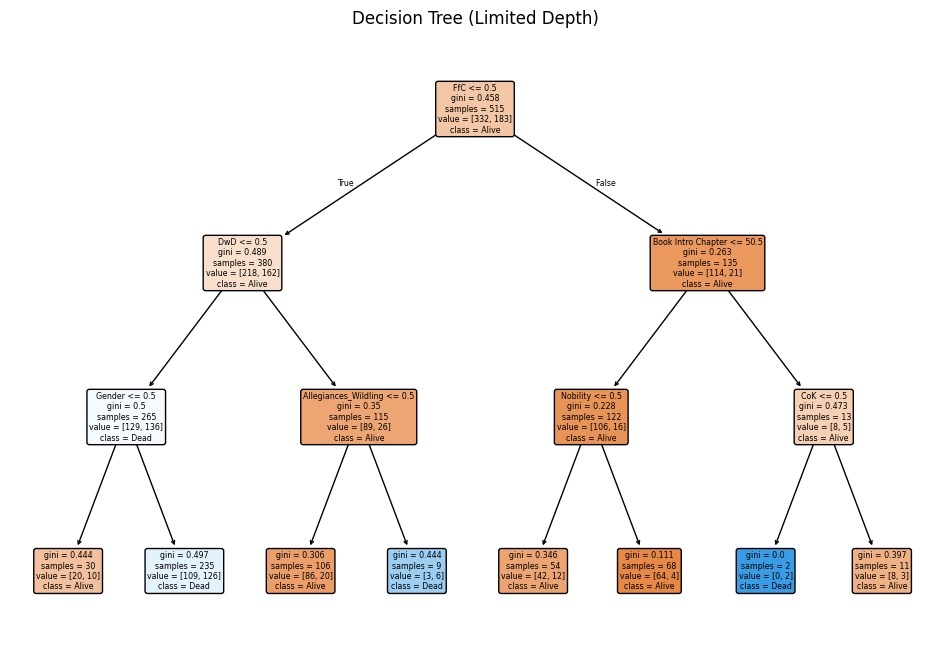

In [ ]:
# 限制決策樹深度，這裡我們假設限制為 3
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)

# 訓練模型
clf_limited.fit(X_train, y_train)

# 可視化決策樹
plt.figure(figsize=(12, 8))
from sklearn import tree
tree.plot_tree(clf_limited, filled=True, feature_names=X_train.columns, class_names=['Alive', 'Dead'], rounded=True)
plt.title("Decision Tree (Limited Depth)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 讀取train和test資料
train_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/topic-test/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/碩一上課堂/1131_dataMining/dataMining/HW1/topic-test/test.csv')

# 填補空值
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# 將死亡欄位轉換為二元變數 'death'
train_df['death'] = train_df['Death Year'].apply(lambda x: 1 if x != 0 else 0)

# 刪除死亡相關的其他欄位
train_df.drop(columns=['Death Year', 'Book of Death', 'Death Chapter'], inplace=True)

# 將Allegiances轉換為虛擬變數
train_df = pd.get_dummies(train_df, columns=['Allegiances'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Allegiances'], drop_first=True)

# 確保test_df與train_df特徵一致
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    if col != 'death':
        test_df[col] = 0
test_df = test_df[train_df.columns.drop('death')]

# 分離訓練特徵和標籤
X_train = train_df.drop(columns=['death', 'Character', 'Name'])
y_train = train_df['death']

# 建立Random Forest模型
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 對測試資料進行預測
X_test = test_df.drop(columns=['Character', 'Name'])
predictions = clf.predict(X_test)

# 按照Test.csv的角色順序重新排列預測結果
sample_submission = pd.DataFrame({
    'Character': test_df['Character'],
    'Death': predictions
})

# 根據Test.csv的Character欄位重新排序
sample_submission = sample_submission.set_index('Character').reindex(test_df['Character']).reset_index()

# 將結果保存為CSV
sample_submission.to_csv('corrected_sample_submission.csv', index=False)
